In [95]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('placement.csv')
df.shape

(1000, 3)

In [96]:
df.sample(5)

,cgpa,placement_exam_marks,placed
290,8.38,87.0,0
979,7.00,13.0,1
587,7.58,14.0,1
201,6.67,15.0,0
770,7.33,67.0,1


C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11660\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_11660\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


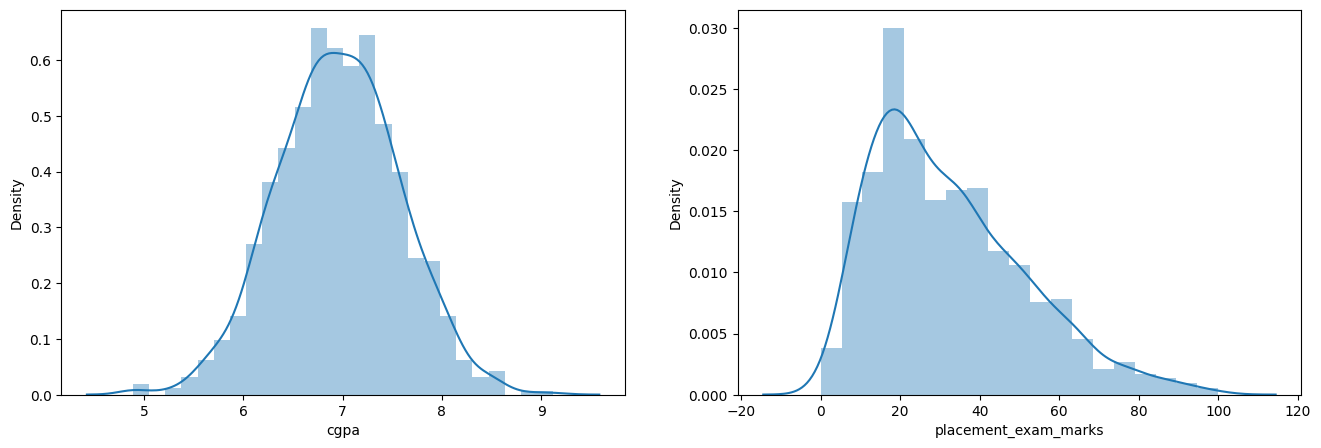

In [97]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [98]:
df['placement_exam_marks'].skew()
print("Mean of the cgpa is: ",df['cgpa'].mean())
print("Standard Deviation of the cgpa is: ",df['cgpa'].std())
print("min of the cgpa is: ",df['cgpa'].min())
print("max of the cgpa is: ",df['cgpa'].max())

Mean of the cgpa is:  6.96124
Standard Deviation of the cgpa is:  0.6158978751323896
min of the cgpa is:  4.89
max of the cgpa is:  9.12


We are finding boundary values to check  the outliers as in our bell curve z_score is defined from -3 to 3

In [99]:
#finding boundary values
print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [100]:
#finding the outliers
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


<h1>Trimming</h1>

In [101]:
new_df = df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [102]:
#approach 2 for finding outliers
#using z-score
df['z_score'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [103]:
df[df['z_score']>3]

,cgpa,placement_exam_marks,placed,z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [104]:
df[df['z_score']<-3]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [105]:
df[(df['z_score'] > 3) | (df['z_score'] < -3)]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [106]:
new_df = df[(df['z_score']>-3) & (df['z_score']<3)]
new_df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


<h1>Capping</h1>

In [107]:
upper_limit = df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit = df['cgpa'].mean()-3*df['cgpa'].std()

In [108]:
#this code is converting the outliers to the upper limit and lower limit values
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )   
)
df.shape

(1000, 4)

In [109]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64